IMPORT DES LIBRAIRIES

In [505]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DES FICHIERS

In [506]:
customers = pd.read_csv('customers.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
transactions = pd.read_csv('transactions.csv', sep=';')

In [507]:
print(len(customers))
customers.head()

8621


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [508]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [509]:
set([type(x) for x in customers['client_id']])

{str}

In [510]:
customers["client_id"].duplicated().sum()

0

In [511]:
customers["birth"].describe()

count    8621.000000
mean     1978.275606
std        16.917958
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64

In [512]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [513]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [514]:
set([type(x) for x in products['id_prod']])

{str}

In [515]:
products["id_prod"].duplicated().sum()

0

In [516]:
products["price"].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [517]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [518]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [519]:
set([type(x) for x in transactions['date']])

{str}

In [520]:
transactions.describe(include="all")

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586


In [521]:
df_transac_custom = pd.merge(transactions, customers, how = "inner", on="client_id")
print(len(df_transac_custom))
df_transac_custom.sort_values(['date']).head()

687534


,id_prod,date,session_id,client_id,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967
63,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960
180,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988
518,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989
757,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956


In [522]:
df_final = pd.merge(df_transac_custom, products, how = "inner", on="id_prod")
print(len(df_final))
df_final = df_final.sort_values(['date'])
df_final.reset_index(inplace=True, drop=True)

687534


TRANCHE D'AGE

In [523]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels_age = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']
df_final['age'] = pd.cut(2023 - df_final['birth'], bins=bins, labels=labels_age, right=False) # False : borne supérieure de chaque intervalle est exclusive

In [524]:
df_final.tail()

,id_prod,date,session_id,client_id,sex,birth,price,categ,age
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,21.92,1,20-30
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,48.99,2,20-30
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,26.99,1,30-40
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,8.99,0,70-80
687533,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575,f,1981,4.52,0,40-50


INDICATEUR AUTOUR DU CHIFFRE D'AFFAIRE

In [525]:
df_CA_categ = pd.DataFrame(df_final.groupby('categ')['price'].sum()).sort_values('price', ascending=False)
df_CA_categ['Cumul_Price'] = df_CA_categ['price'].cumsum()/df_CA_categ['price'].sum()*100
df_CA_categ.head()

,price,Cumul_Price
categ,,
1,4827657.11,40.137948
0,4419730.97,76.884329
2,2780275.02,100.000000


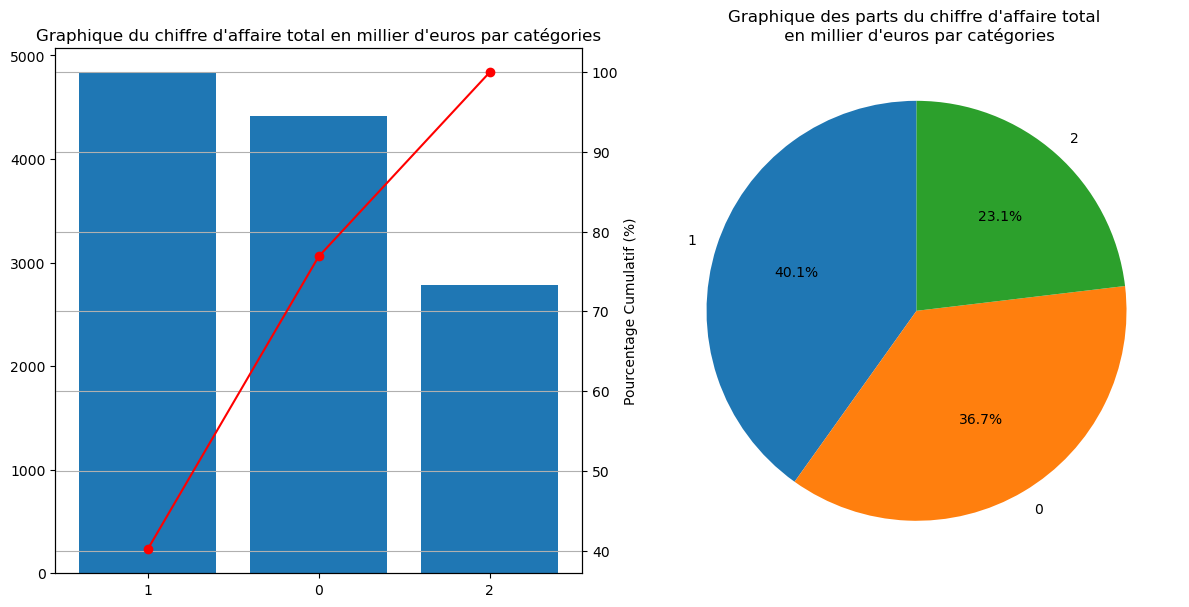

In [526]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
bars = plt.bar(df_CA_categ.index.astype(str), df_CA_categ['price']/1000)
ax2 = plt.gca().twinx()
ax2.plot(df_CA_categ.index.astype(str), df_CA_categ['Cumul_Price'], color='red', marker="o")
plt.grid(axis = "y")
plt.xlabel('Catégorie')
plt.ylabel("Chiffre d'affaire total en millier d'euros")
ax2.set_ylabel('Pourcentage Cumulatif (%)')
plt.title("Graphique du chiffre d'affaire total en millier d'euros par catégories")

plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, premier graphique
plt.pie(df_CA_categ['price'], labels=df_CA_categ.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title("Graphique des parts du chiffre d'affaire total \n en millier d'euros par catégories")

plt.tight_layout()
plt.show()

In [527]:
df_CA_HF = df_final.groupby('sex')['price'].sum()
df_CA_HF.head()

sex
f    5950843.68
m    6076819.42
Name: price, dtype: float64

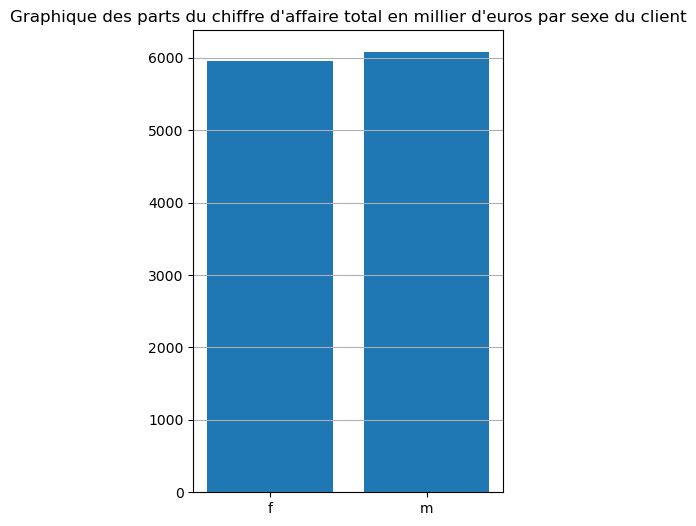

In [582]:
plt.figure(figsize=(4, 6))
plt.bar(df_CA_HF.index, df_CA_HF/1000)
plt.grid(axis = "y")
plt.title("Graphique des parts du chiffre d'affaire total en millier d'euros par sexe du client")
plt.show()

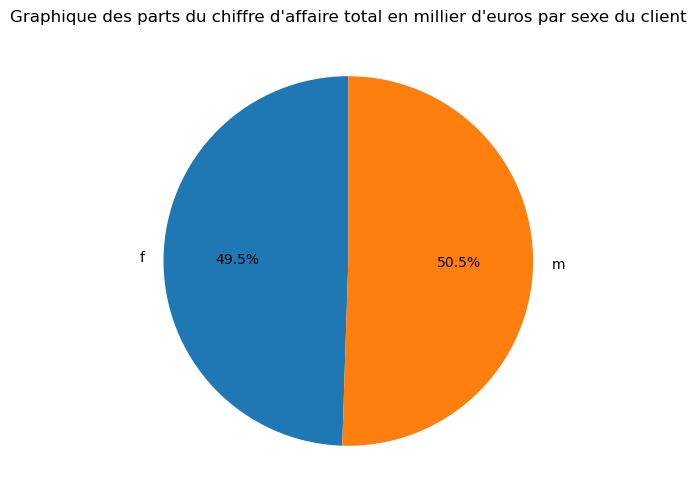

In [528]:
plt.figure(figsize=(10, 6))
plt.pie(df_CA_HF, labels=df_CA_HF.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title("Graphique des parts du chiffre d'affaire total en millier d'euros par sexe du client")
plt.show()

In [529]:
# Grouper par 'client_id' et compter le nombre d'apparitions
comptage = df_final.groupby('client_id').size().reset_index(name='Nombre_Apparitions')
price_somme  = df_final.groupby('client_id')['price'].sum().reset_index(name='Total_Price')
df_CA_rec_client = pd.merge(comptage, price_somme, how = "inner", on="client_id")
df_CA_rec_client = df_CA_rec_client.sort_values('Nombre_Apparitions', ascending=True)

df_CA_rec_client.head()

,client_id,Nombre_Apparitions,Total_Price
3576,c_4223,1,24.81
4044,c_4648,1,11.20
8151,c_8351,1,6.31
694,c_1624,1,28.54
5868,c_6292,1,24.24


on enleve les valeurs au dessus de 5000 appartitions sinon le graphique est illisible

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


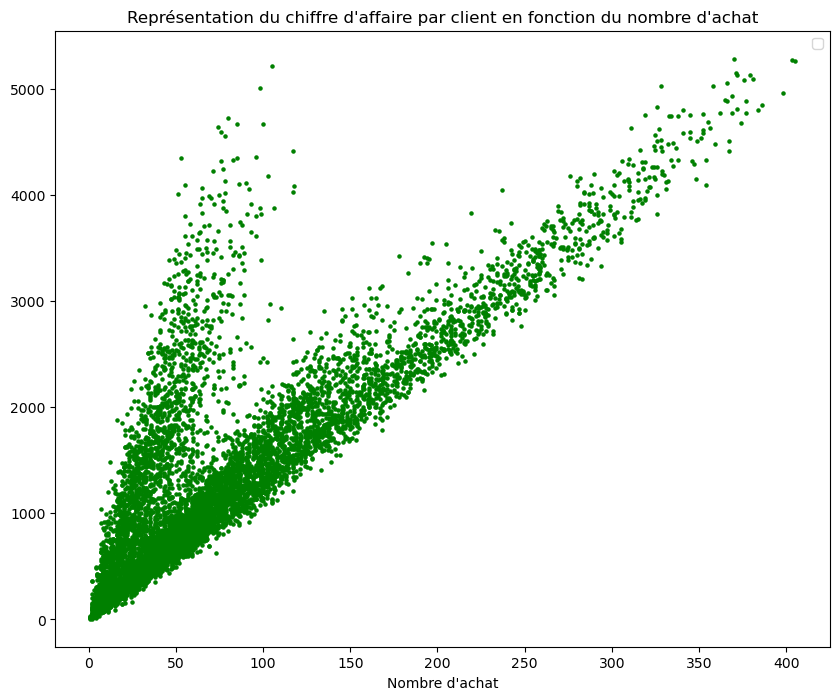

In [583]:
plt.figure(figsize=(10, 8))
plt.scatter(df_CA_rec_client['Nombre_Apparitions'].loc[df_CA_rec_client['Nombre_Apparitions'] < 5000], df_CA_rec_client['Total_Price'].loc[df_CA_rec_client['Nombre_Apparitions'] < 5000], marker="o", color = 'green', s= 5)
plt.xlabel('Nombre d\'achat')
plt.title('Représentation du chiffre d\'affaire par client en fonction du nombre d\'achat')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


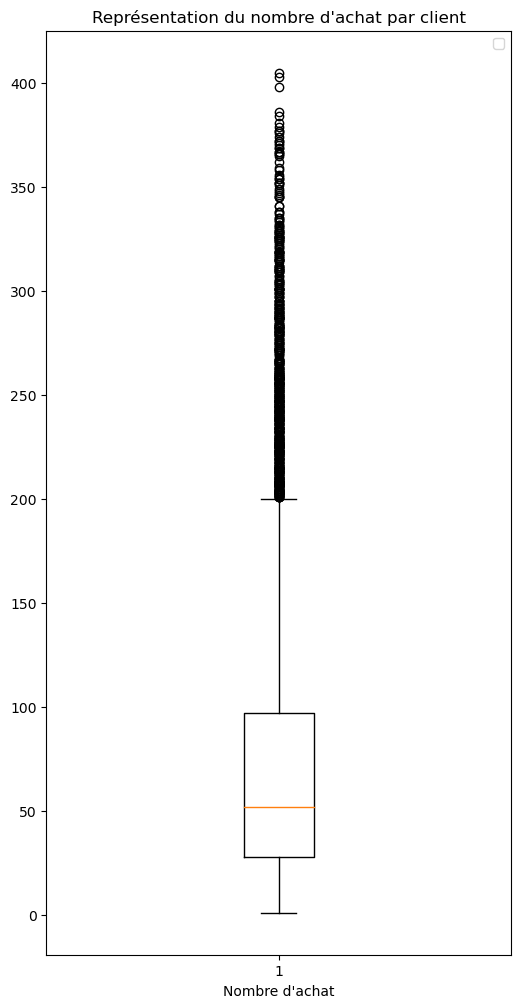

In [531]:
plt.figure(figsize=(6, 12))
plt.boxplot(df_CA_rec_client['Nombre_Apparitions'].loc[df_CA_rec_client['Nombre_Apparitions'] < 5000])
plt.xlabel('Nombre d\'achat')
plt.title('Représentation du nombre d\'achat par client')
plt.legend()
plt.show()

In [532]:
df_CA_rec_client.reset_index(inplace=True, drop=True)
df_CA_rec_client['Somme_Prix_Cumule'] = df_CA_rec_client['Total_Price'].cumsum()/df_CA_rec_client['Total_Price'].sum()*100
df_CA_rec_client['Nombre_Apparitions_prop'] = df_CA_rec_client['Nombre_Apparitions'].cumsum()/df_CA_rec_client['Nombre_Apparitions'].sum()*100
df_CA_rec_client['Part_Cumule_Client'] = df_CA_rec_client.index / max(df_CA_rec_client.index)*100
df_CA_rec_client_reduit = df_CA_rec_client.iloc[::int(max(df_CA_rec_client.index)/20)]
if df_CA_rec_client_reduit.index[-1] != df_CA_rec_client.index[-1]:
    df_CA_rec_client_reduit = pd.concat([df_CA_rec_client_reduit, df_CA_rec_client.iloc[[-1]]])
    df_CA_rec_client_reduit = df_CA_rec_client_reduit.drop(df_CA_rec_client_reduit.index[-2])
df_CA_rec_client_reduit.tail()

,client_id,Nombre_Apparitions,Total_Price,Somme_Prix_Cumule,Nombre_Apparitions_prop,Part_Cumule_Client
6864,c_5760,112,1409.32,55.717822,46.101138,79.823235
7293,c_6655,133,1729.90,62.341969,53.748178,84.812187
7722,c_4844,167,2151.12,69.930222,63.044446,89.801140
8151,c_6253,226,3040.52,79.164526,75.154683,94.790092
8599,c_1609,25586,326039.89,100.000000,100.000000,100.000000


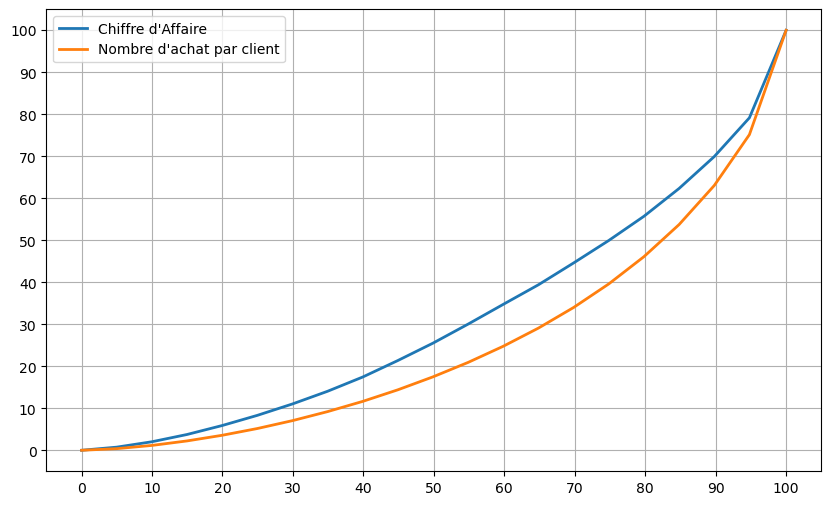

In [533]:
plt.figure(figsize=(10, 6))
plt.plot(df_CA_rec_client_reduit['Part_Cumule_Client'], df_CA_rec_client_reduit['Somme_Prix_Cumule'], linewidth = 2, label="Chiffre d\'Affaire")
plt.plot(df_CA_rec_client_reduit['Part_Cumule_Client'], df_CA_rec_client_reduit['Nombre_Apparitions_prop'], linewidth = 2, label="Nombre d\'achat par client")
plt.grid(axis = "x")
plt.grid(axis = "y")
plt.xticks(np.arange(0, 100 + 0.01, step=10))
plt.yticks(np.arange(0, 100 + 0.01, step=10))
plt.legend()
plt.show()

In [534]:
df_final['date'] = pd.to_datetime(df_final['date'].str[:10])
df_final.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,age
0,0_1259,2021-03-01,s_1,c_329,f,1967,11.99,0,50-60
1,0_1390,2021-03-01,s_2,c_664,m,1960,19.37,0,60-70
2,0_1352,2021-03-01,s_3,c_580,m,1988,4.50,0,30-40
3,0_1458,2021-03-01,s_4,c_7912,f,1989,6.55,0,30-40
4,0_1358,2021-03-01,s_5,c_2033,f,1956,16.49,0,60-70


In [535]:
df_CA_day = pd.DataFrame(df_final.groupby('date')['price'].sum())
df_CA_day['mm14'] = df_CA_day.rolling(window=14).mean()
df_CA_day.head()

,price,mm14
date,,
2021-03-01,16565.22,NaN
2021-03-02,15486.45,NaN
2021-03-03,15198.69,NaN
2021-03-04,15196.07,NaN
2021-03-05,17471.37,NaN


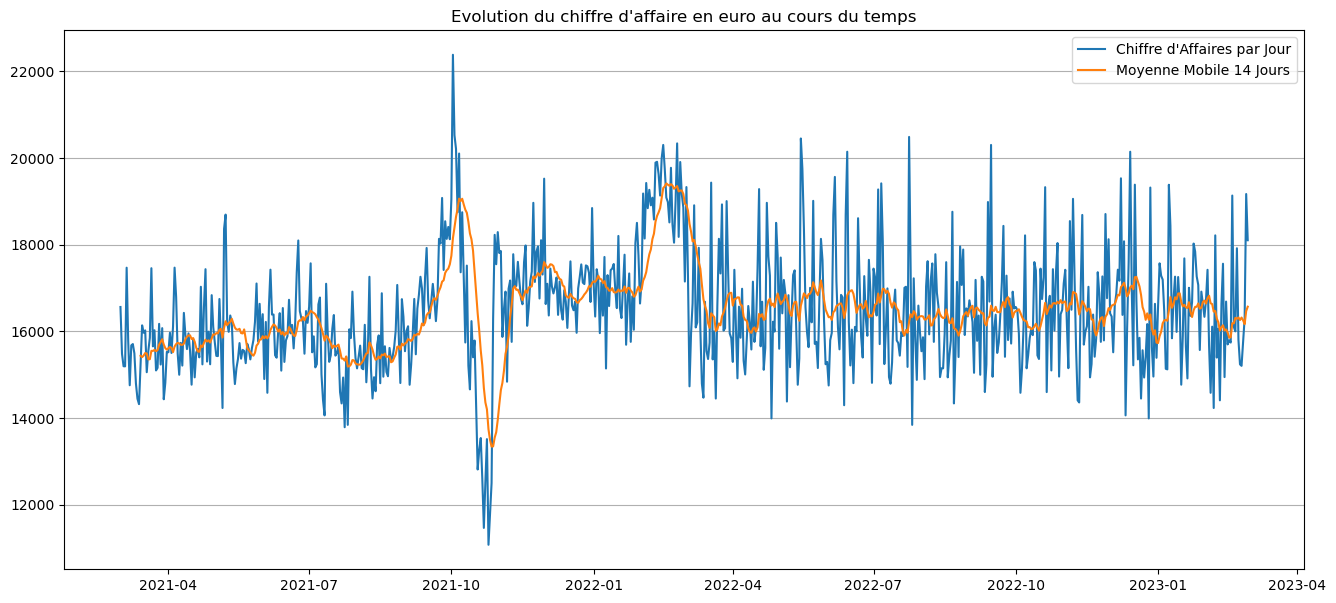

In [536]:
plt.figure(figsize=(16, 7))
plt.plot(df_CA_day.index, df_CA_day['price'], label='Chiffre d\'Affaires par Jour')
plt.plot(df_CA_day.index, df_CA_day['mm14'], label='Moyenne Mobile 14 Jours', linestyle='-')
plt.legend()
plt.grid(axis = "y")
plt.title("Evolution du chiffre d\'affaire en euro au cours du temps")
plt.show()

In [537]:
df_CA_MM_categ = pd.DataFrame()
df_CA_MM_categ['Total_Price'] = df_final.groupby('date')['price'].sum()
for i in range(3):
    df_CA_MM_categ[str(i)] = df_final.loc[df_final['categ'] == i].groupby('date')['price'].sum()
    df_CA_MM_categ['mm'+str(i)] = df_CA_MM_categ[str(i)].rolling(window=14).mean()
df_CA_MM_categ.head()

,Total_Price,0,mm0,1,mm1,2,mm2
date,,,,,,,
2021-03-01,16565.22,6262.65,NaN,6811.53,NaN,3491.04,NaN
2021-03-02,15486.45,6718.27,NaN,5627.15,NaN,3141.03,NaN
2021-03-03,15198.69,6121.03,NaN,5691.41,NaN,3386.25,NaN
2021-03-04,15196.07,5891.48,NaN,6098.98,NaN,3205.61,NaN
2021-03-05,17471.37,5975.97,NaN,7071.21,NaN,4424.19,NaN


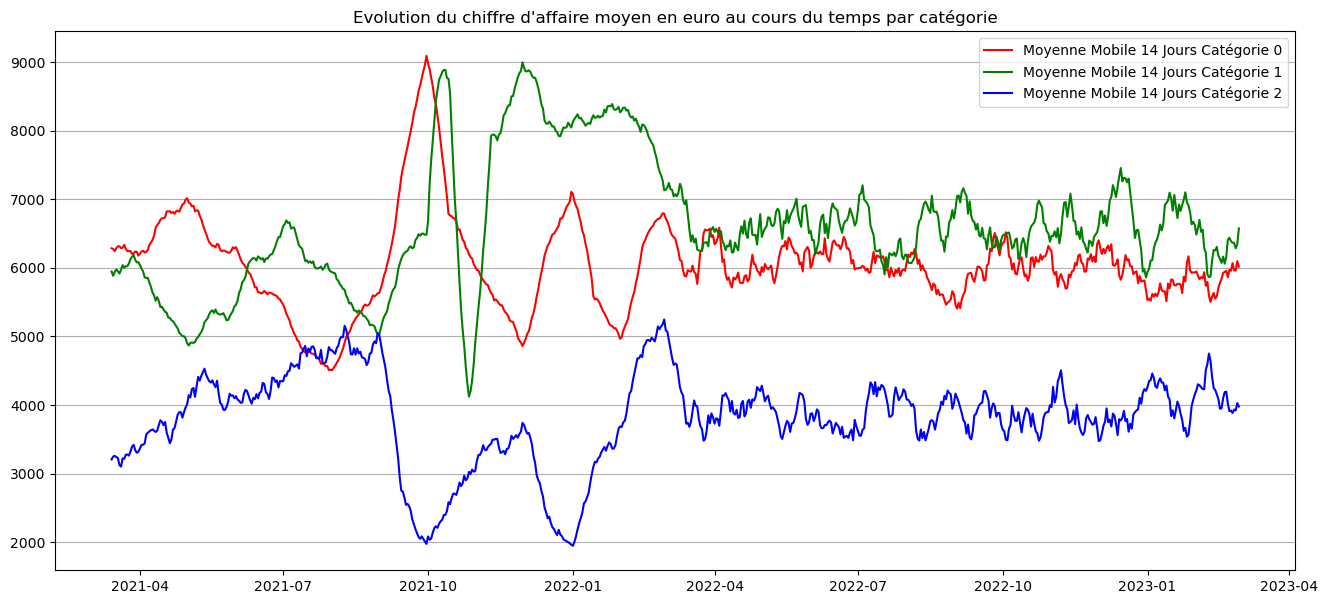

In [538]:
plt.figure(figsize=(16, 7))
#plt.plot(df_CA_MM_categ.index, df_CA_MM_categ['Total_Price'], label='Chiffre d\'Affaires par Jour', color='blue')
plt.plot(df_CA_MM_categ.index, df_CA_MM_categ['mm0'], label='Moyenne Mobile 14 Jours Catégorie 0', linestyle='-', color='red')
plt.plot(df_CA_MM_categ.index, df_CA_MM_categ['mm1'], label='Moyenne Mobile 14 Jours Catégorie 1', linestyle='-', color='green')
plt.plot(df_CA_MM_categ.index, df_CA_MM_categ['mm2'], label='Moyenne Mobile 14 Jours Catégorie 2', linestyle='-', color='blue')
plt.legend()
plt.grid(axis = "y")
plt.title("Evolution du chiffre d\'affaire moyen en euro au cours du temps par catégorie")
plt.show()

In [539]:
df_CA_annuel = df_final[['date', 'categ', 'price']].copy()
df_CA_annuel['date'] = df_CA_annuel['date'].dt.year
df_CA_annuel_2 = pd.crosstab(df_CA_annuel['date'], df_CA_annuel['categ'], values=df_CA_annuel['price'], aggfunc='sum')
df_CA_annuel = df_CA_annuel.groupby(['date', 'categ'])['price'].sum()
#df_CA_annuel= pd.DataFrame(df_CA_annuel.groupby('date')['price'].sum()).sort_values('price', ascending=False)
#df_CA_annuel['Somme_Cumul'] = df_CA_annuel['date'].cumsum()/df_CA_annuel['price'].sum()*100
#somme_par_date = df_CA_annuel.groupby('date')['price'].sum().reset_index(name='Somme_Cumul')
df_CA_annuel = pd.DataFrame(df_CA_annuel)
df_CA_annuel['Somme_Cumul'] = df_CA_annuel.cumsum()/df_CA_annuel.sum()*100
df_CA_annuel[df_CA_annuel.index.get_level_values('categ') == 0]['price']/1000
df_CA_annuel_categ0 = df_CA_annuel[df_CA_annuel.index.get_level_values('categ') == 0]['price']/1000
df_CA_annuel_categ1 = df_CA_annuel[df_CA_annuel.index.get_level_values('categ') == 1]['price']/1000
df_CA_annuel_categ2 = df_CA_annuel[df_CA_annuel.index.get_level_values('categ') == 2]['price']/1000
df_CA_annuel_index = df_CA_annuel.index.get_level_values('date').unique().astype(str)
df_CA_annuel_2

categ,0,1,2
date,,,
2021,1883020.45,1951930.27,1109810.26
2022,2192970.46,2485275.19,1430436.16
2023,343740.06,390451.65,240028.60


In [459]:
df_CA_annuel

price  Somme_Cumul
date categ                         
2021 0      1883020.45    15.655747
     1      1951930.27    31.884421
     2      1109810.26    41.111569
2022 0      2192970.46    59.344291
     1      2485275.19    80.007284
     2      1430436.16    91.900170
2023 0       343740.06    94.758082
     1       390451.65    98.004362
     2       240028.60   100.000000

on a des données jusqu'au 28 février 2023

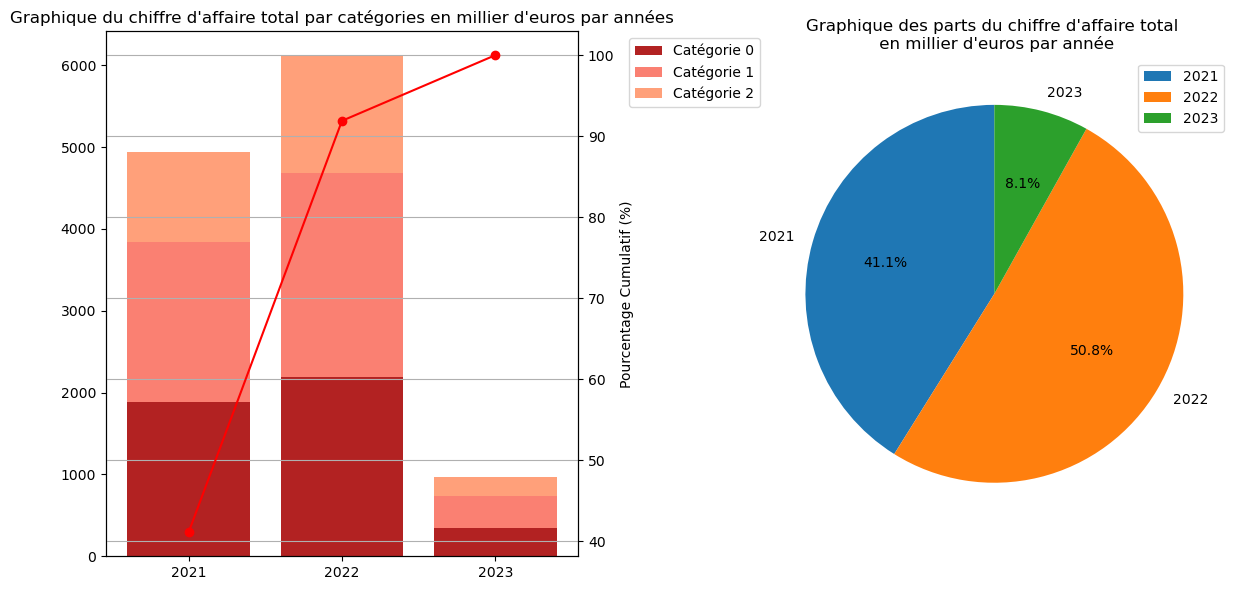

In [540]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
plt.bar(df_CA_annuel_index, df_CA_annuel_categ0, label='Catégorie 0', color='firebrick')
plt.bar(df_CA_annuel_index, df_CA_annuel_categ1, bottom=df_CA_annuel_categ0, label='Catégorie 1', color='salmon')
plt.bar(df_CA_annuel_index, df_CA_annuel_categ2, bottom=df_CA_annuel_categ1.values + df_CA_annuel_categ0.values, label='Catégorie 2', color='lightsalmon')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax2 = plt.gca().twinx()
ax2.plot(df_CA_annuel_index, df_CA_annuel[df_CA_annuel.index.get_level_values('categ') == 2]['Somme_Cumul'], color='red', marker='o')
plt.grid(axis = "y")
plt.xlabel('Années')
plt.ylabel("Chiffre d'affaire en millier d'euros")
ax2.set_ylabel('Pourcentage Cumulatif (%)')
plt.title("Graphique du chiffre d'affaire total par catégories en millier d'euros par années")

plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, premier graphique
plt.pie(df_CA_annuel.groupby('date')['price'].sum(), labels=df_CA_annuel_index, autopct='%1.1f%%', startangle=90)
plt.title("Graphique des parts du chiffre d'affaire total \n en millier d'euros par année")
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

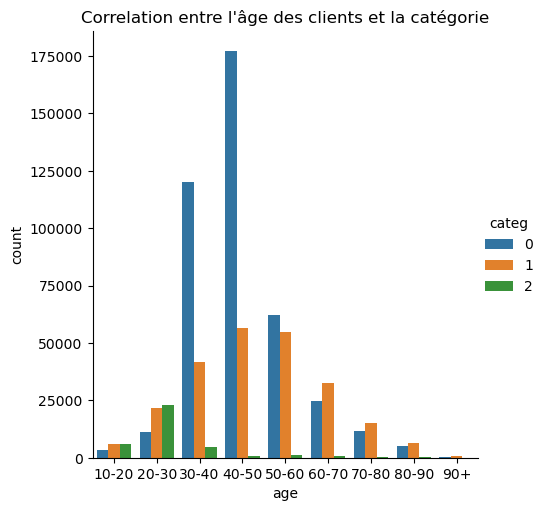

In [558]:
plt.figure(figsize=(12, 6))
sns.catplot(x = "age", kind = "count", hue="categ", data= df_final)
plt.title("Correlation entre l'âge des clients et la catégorie")
plt.show()

<Figure size 1200x600 with 0 Axes>

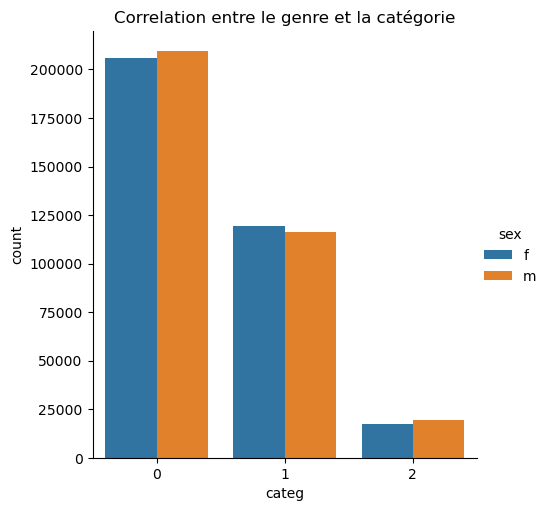

In [561]:
plt.figure(figsize=(12, 6))
sns.catplot(x = "categ", kind = "count", hue="sex", data= df_final)
plt.title("Correlation entre le genre et la catégorie")
plt.show()

In [573]:
df_CA_par_age = pd.crosstab(df_final['age'], df_final['client_id'], values=df_final['price'], aggfunc='sum')
df_CA_par_age = df_CA_par_age.mean(axis=1)
df_CA_par_age

age
10-20     71.676529
20-30    267.750003
30-40    289.035201
40-50    360.722810
50-60    217.967327
60-70    114.080408
70-80     51.911907
80-90     22.996463
90+        2.424828
dtype: float64

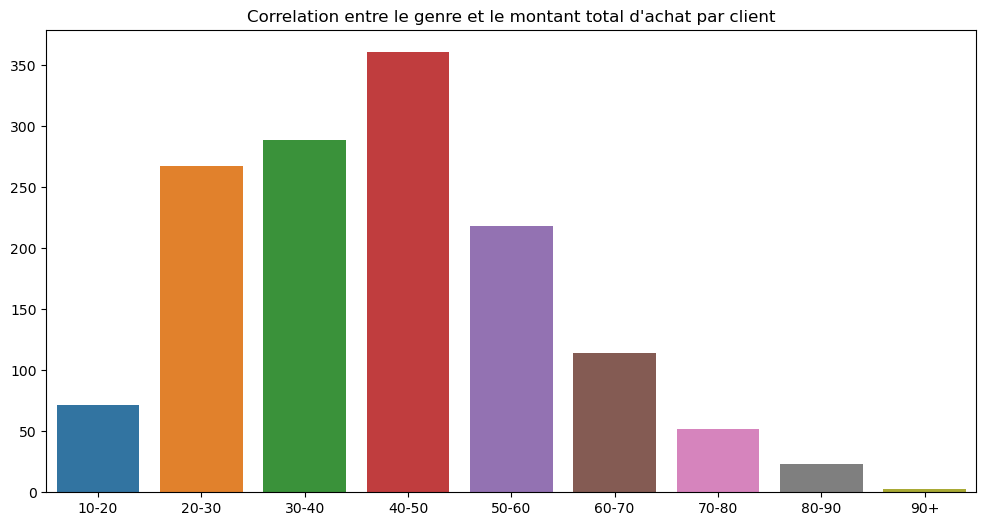

In [576]:
plt.figure(figsize=(12, 6))
sns.barplot(x = labels_age, y = df_CA_par_age)
plt.title("Correlation entre le genre et le montant total d\'achat par client")
plt.show()

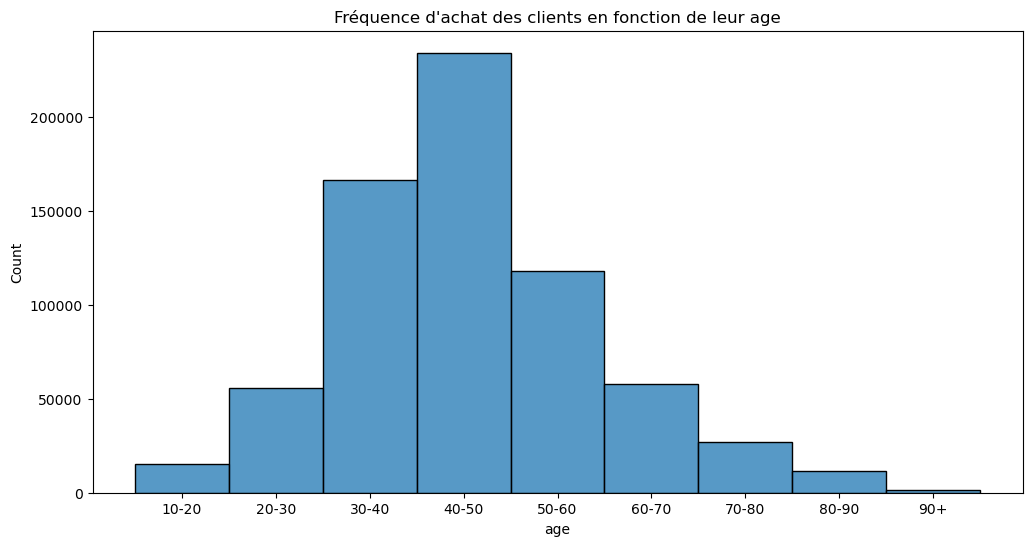

In [578]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_final, x = 'age', bins=10)
plt.title("Fréquence d\'achat des clients en fonction de leur age")
plt.show()